In [1]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [2]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain  = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

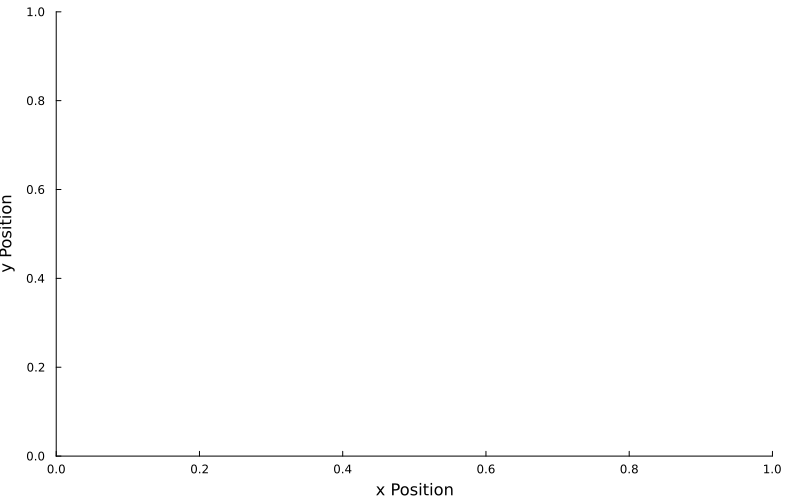

In [4]:
# Define the plot
num_points = 50

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2], xlabel="x Position", ylabel="y Position", color=:viridis, colorbar_title="Amplitude", size=plot_size, grid=false)

In [5]:
ops = gaussian_operators_2D(0.1, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#38"{Float64, Matrix{Float64}, Matrix{Float64}, var"#gauss2DN#37"{var"#gauss2D#36"}}(0.1, [0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], var"#gauss2DN#37"{var"#gauss2D#36"}(var"#gauss2D#36"())), var"#Φ#40"{var"#ϕ#38"{Float64, Matrix{Float64}, Matrix{Float64}, var"#gauss2DN#37"{var"#gauss2D#36"}}}(var"#ϕ#38"{Float64, Matrix{Float64}, Matrix{Float64}, var"#gauss2DN#37"{var"#gauss2D#36"}}(0.1, [0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], var"#gauss2DN#37"{var"#gauss2D#36"}(var"#gauss2D#36"()))), var"#adjΦ#41"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#35#42"{var"#ϕ#38"{Float64, Matrix{Float64}, Matrix{Float64}, var"#gauss2DN#37"{var"#gauss2D#36"}}}}([0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.

## Pre-certificate

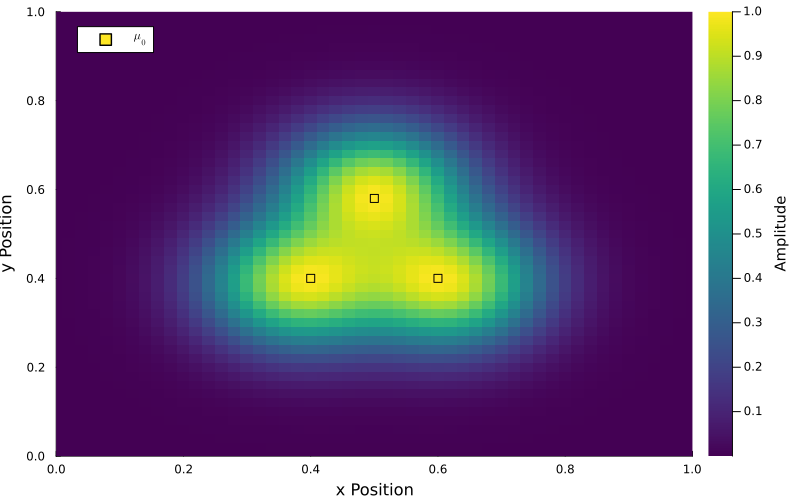

In [6]:
x0 = [[0.4, 0.5, 0.6], [0.4, 0.58, 0.4]]
a0 = [1.0, 1.0, 1.0]

μ0 = DiscreteMeasure(x0, a0)

ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0", marker=:square)

### SFW

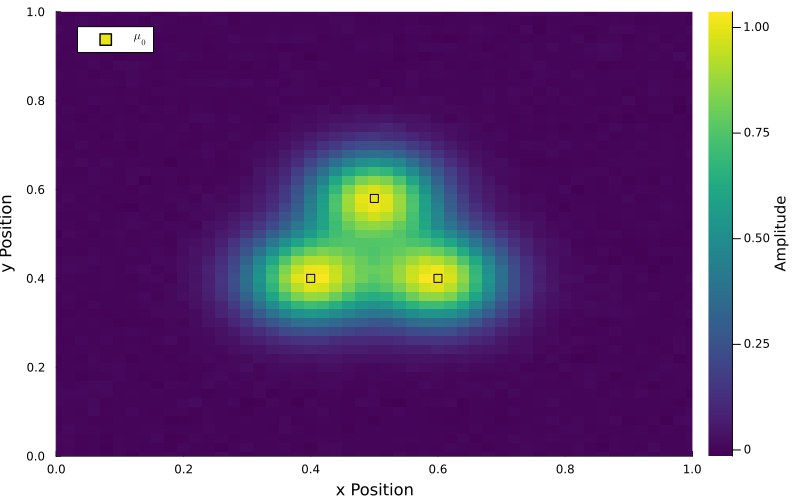

In [8]:
y0 = ops.Φ(μ0...)

function add_noise(y0, noise_level)
    sigma = noise_level * norm(y0)
    w = randn(length(y0))
    w = w / norm(w) * sigma
    y = y0 + w
    return y
end

# Add noise to the observation y = y0 + w
noise_level = 0.02
y = add_noise(y0, noise_level)

plt_obs = deepcopy(plt)

heatmap!(plt_obs, grid, grid, reshape(y, size(plt_grid_x1)), color=:viridis)
plot_spikes!(plt_obs, μ0, label=L"μ_0", marker=:square)

In [ ]:
prob = BLASSO(y, ops, domain)

plt_cert_behav = deepcopy(plt_obs)

solve!(prob, :SFW, options=Dict(:δ => noise_level, :τ => 10, :q => 0.5))
plot_spikes!(plt_cert_behav, prob.μ, label=L"\hat{μ}", marker=:circle)

λ = 1000.0
  1.345032 seconds (5.11 M allocations: 236.088 MiB, 9.59% gc time, 70.34% compilation time)
r: 12.145276308478572
τδ: 0.2
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ = 500.0
  0.366468 seconds (4.67 M allocations: 213.571 MiB, 22.66% gc time)
r: 12.145276308478572
τδ: 0.2
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ = 250.0
  0.331556 seconds (4.67 M allocations: 213.571 MiB, 13.25% gc time)
r: 12.145276308478572
τδ: 0.2
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ = 125.0
  0.861518 seconds (4.67 M allocations: 213.571 MiB, 66.32% gc time)
r: 12.145276308478572
τδ: 0.2
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ = 62.5
  0.303969 seconds (4.67 M allocations: 213.571 MiB, 9.59% gc time)
r: 12.145276308478572
τδ: 0.2
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ = 31.25
 42.761290 seconds (284.87 M allocations: 39.546 GiB, 15.96% gc time, 33.23% compilation tim